In [1]:
#importing librabries
import pandas as pd
import matplotlib.pyplot as plt
import numpy

## EXPLORATIVE DATA ANALYSIS

In [2]:
df = pd.read_csv("housepricedata.csv")

In [3]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
df.shape

(1460, 11)

In [5]:
#converting our dataframe into an array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
df.describe()


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [7]:
#Checking for null values
df.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [8]:
#spliting our dataset into input features (X) and the feature we wish to predict (Y)
X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
# Processing to make sure that the scale of the input features are similar.
from sklearn import preprocessing


In [10]:
# Using the min-max scaler to scale the dataset so that all the input features lie between 0 and 1 inclusive
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
#spliting dataset into a training, validation and a test set.
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## METHODOLOGY

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model_1 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist_1 = model_1.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6897 - accuracy: 0.4961 - val_loss: 0.6820 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.4961 - val_loss: 0.6755 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.4980 - val_loss: 0.6683 - val_accuracy: 0.5251
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5127 - val_loss: 0.6600 - val_accuracy: 0.5342
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.5450 - val_loss: 0.6504 - val_accuracy: 0.6119
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.5851 - val_loss: 0.6410 - val_accuracy: 0.6758
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6624 - val_loss: 0.6321 - val_accuracy: 0.7306
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8777 - val_loss: 0.3266 - val_accuracy: 0.8950
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8777 - val_loss: 0.3250 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8757 - val_loss: 0.3193 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8757 - val_loss: 0.3195 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8767 - val_loss: 0.3170 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8757 - val_loss: 0.3158 - val_accuracy: 0.8950
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8728 - val_loss: 0.3149 - val_accuracy: 0.8950
Epoch 

# Visualizing Loss and Accuracy

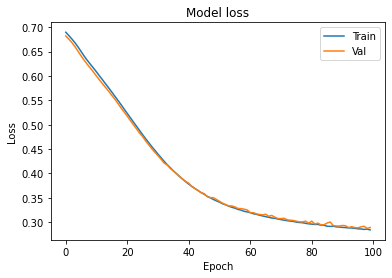

In [20]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [21]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])



In [22]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              


In [23]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 38ms/step - loss: 0.5141 - accuracy: 0.7436 - val_loss: 0.3654 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3547 - accuracy: 0.8493 - val_loss: 0.3054 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3221 - accuracy: 0.8679 - val_loss: 0.2823 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2820 - accuracy: 0.8826 - val_loss: 0.3273 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2713 - accuracy: 0.8894 - val_loss: 0.2885 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2598 - accuracy: 0.8767 - val_loss: 0.2837 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2529 - accuracy: 0.8845 - val_loss: 0.2614 - val_accuracy: 0.8995
Epoch 

32/32 [==============================] - 1s 35ms/step - loss: 0.1534 - accuracy: 0.9384 - val_loss: 0.4641 - val_accuracy: 0.9178
Epoch 59/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1924 - accuracy: 0.9217 - val_loss: 0.4557 - val_accuracy: 0.9132
Epoch 60/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1780 - accuracy: 0.9256 - val_loss: 0.2883 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1674 - accuracy: 0.9305 - val_loss: 0.4686 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1406 - accuracy: 0.9403 - val_loss: 0.3956 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1335 - accuracy: 0.9413 - val_loss: 0.4585 - val_accuracy: 0.9087
Epoch 64/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1506 - accuracy: 0.9344 - val_loss: 0.3684 - val_accuracy: 0.8904
Epoch 65/100

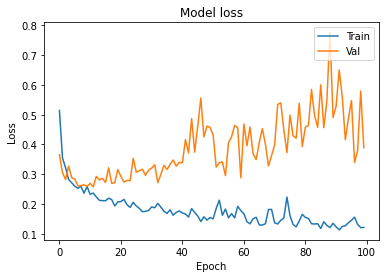

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

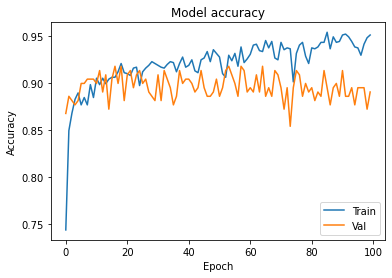

In [25]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
X_val

array([[0.0664797 , 0.44444444, 0.625     , ..., 0.25      , 0.33333333,
        0.23836389],
       [0.02692281, 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.5528914 ],
       [0.04440394, 0.44444444, 0.5       , ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.03986071, 0.77777778, 0.5       , ..., 0.5       , 0.33333333,
        0.32863188],
       [0.04640445, 0.66666667, 0.5       , ..., 0.58333333, 0.33333333,
        0.47813822],
       [0.01963121, 0.44444444, 0.75      , ..., 0.33333333, 0.        ,
        0.34132581]])

In [27]:
y_pred = model_2.predict(X_val)
y_pred

array([[4.03299928e-03],
       [9.85312581e-01],
       [1.74984762e-05],
       [8.94899964e-01],
       [1.74168201e-06],
       [9.17152822e-01],
       [9.62409973e-01],
       [4.84983146e-01],
       [4.56861645e-01],
       [2.63240039e-02],
       [1.03989244e-03],
       [1.17050507e-17],
       [4.72334504e-01],
       [8.11362684e-01],
       [3.17413169e-13],
       [1.79818358e-07],
       [8.73432219e-01],
       [9.60063457e-01],
       [4.97953465e-07],
       [1.09401941e-02],
       [8.95809829e-01],
       [5.63223648e-14],
       [9.74247515e-01],
       [5.40166378e-01],
       [3.97752906e-08],
       [9.23618376e-01],
       [9.96595621e-01],
       [7.13052048e-11],
       [2.19879955e-01],
       [6.99506175e-10],
       [2.14436650e-03],
       [5.33642888e-01],
       [2.28316158e-01],
       [9.49509621e-01],
       [9.99989390e-01],
       [4.21078190e-12],
       [8.41272235e-01],
       [9.80847836e-01],
       [1.18552934e-14],
       [7.28219032e-01],


In [28]:
y_pred_int = (y_pred<0.5).astype(int)
y_pred_int

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(Y_val, y_pred_int)

0.1095890410958904

In [31]:
#Reduce over-fitting 

In [32]:
from keras.layers import Dropout
from keras import regularizers

In [33]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [34]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
    

In [35]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 65ms/step - loss: 14.2208 - accuracy: 0.6898 - val_loss: 3.8612 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 2s 70ms/step - loss: 1.6584 - accuracy: 0.8346 - val_loss: 0.7567 - val_accuracy: 0.7808
Epoch 3/100
32/32 [==============================] - 2s 70ms/step - loss: 0.5854 - accuracy: 0.8562 - val_loss: 0.5574 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 2s 61ms/step - loss: 0.5246 - accuracy: 0.8552 - val_loss: 0.4754 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 2s 67ms/step - loss: 0.4925 - accuracy: 0.8601 - val_loss: 0.4756 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 2s 57ms/step - loss: 0.4749 - accuracy: 0.8689 - val_loss: 0.4622 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 2s 55ms/step - loss: 0.4892 - accuracy: 0.8669 - val_loss: 0.5226 - val_accuracy: 0.8219
Epoch

32/32 [==============================] - 2s 54ms/step - loss: 0.4337 - accuracy: 0.8885 - val_loss: 0.4327 - val_accuracy: 0.8904 0s - l
Epoch 59/100
32/32 [==============================] - 2s 55ms/step - loss: 0.4473 - accuracy: 0.8787 - val_loss: 0.4285 - val_accuracy: 0.9041
Epoch 60/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4309 - accuracy: 0.8767 - val_loss: 0.4779 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4282 - accuracy: 0.8855 - val_loss: 0.4340 - val_accuracy: 0.8858
Epoch 62/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4526 - accuracy: 0.8689 - val_loss: 0.4395 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4344 - accuracy: 0.8816 - val_loss: 0.4296 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4417 - accuracy: 0.8728 - val_loss: 0.4607 - val_accuracy: 0.8539
Epoch

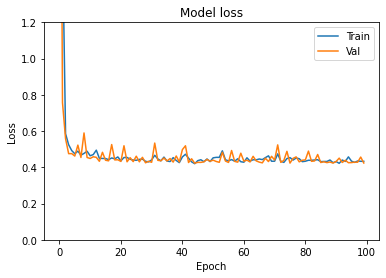

In [36]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

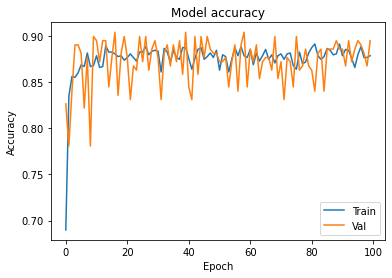

In [37]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show(
)

## Hyperparameter optimization

### Batch size and epochs

In [38]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [39]:
# Using scikit-learn to grid search the batch size and epochs
# Creating function for model required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-39-7d91281d9787>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.530133 using {'batch_size': 40, 'epochs': 100}
0.460283 (0.012424) with: {'batch_size': 10, 'epochs': 10}
0.458242 (0.023943) with: {'batch_size': 10, 'epochs': 50}
0.508209 (0.016832) with: {'batch_size': 10, 'epochs': 100}
0.460276 (0.009415) with: {'batch_size': 20, 'epochs': 10}
0.487657 (0.029784) with: {'batch_size': 20, 'epochs': 50}
0.487005 (0.023096) with: {'batch_size': 20, 'epochs': 100}
0.467805 (0.006084) with: {'batch_size': 40, 'epochs': 10}
0.463715 (0.017010) with: {'batch_size': 40, 'epochs': 50}
0.530133 (0.004597) with: {'batch_size': 40, 'epochs': 100}
0.450007 (0.008772) with: {'batch_size': 60, 'epochs': 10}
0.483556 (0.018545) with: {'batch_size': 60, 'epochs': 50}
0.500007 (0.013805) with: {'batch_size': 60, 'epochs': 100}
0.458237 (0.019107) with: {'batch_size': 80, 'epochs': 10}
0.499307 (0.008240) with: {'batch_size': 80, 'epochs': 50}
0.474652 (0.022444) with: {'batch_size': 80, 'epochs': 100}
0.473971 (0.017713) with: {'batch_size': 100, 'epochs':

In [40]:
# experiment 2 Using scikit-learn to grid search the batch size and epochs

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [5, 10, 15, 20, 25, 30]
epochs = [10, 40, 150]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-40-5ea68bffc0eb>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.541763 using {'batch_size': 5, 'epochs': 150}
0.469181 (0.016185) with: {'batch_size': 5, 'epochs': 10}
0.495888 (0.019499) with: {'batch_size': 5, 'epochs': 40}
0.541763 (0.024519) with: {'batch_size': 5, 'epochs': 150}
0.464394 (0.028076) with: {'batch_size': 10, 'epochs': 10}
0.475349 (0.019815) with: {'batch_size': 10, 'epochs': 40}
0.482900 (0.023791) with: {'batch_size': 10, 'epochs': 150}
0.454128 (0.019360) with: {'batch_size': 15, 'epochs': 10}
0.467140 (0.019706) with: {'batch_size': 15, 'epochs': 40}
0.520527 (0.025587) with: {'batch_size': 15, 'epochs': 150}
0.453447 (0.022795) with: {'batch_size': 20, 'epochs': 10}
0.467135 (0.019704) with: {'batch_size': 20, 'epochs': 40}
0.464387 (0.012207) with: {'batch_size': 20, 'epochs': 150}
0.463715 (0.023825) with: {'batch_size': 25, 'epochs': 10}
0.478075 (0.022353) with: {'batch_size': 25, 'epochs': 40}
0.513705 (0.037421) with: {'batch_size': 25, 'epochs': 150}
0.436318 (0.024742) with: {'batch_size': 30, 'epochs': 10}


In [41]:
# experiment 3 Use scikit-learn to grid search the batch size and epochs
# Function to create model, required for KerasClassifier
def create_model():
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [5, 10, 15, 20, 25, 30]
epochs = [10, 40, 150]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-41-a5518e88fc85>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.801334 using {'batch_size': 5, 'epochs': 150}
0.641685 (0.100289) with: {'batch_size': 5, 'epochs': 10}
0.586356 (0.080463) with: {'batch_size': 5, 'epochs': 40}
0.801334 (0.037629) with: {'batch_size': 5, 'epochs': 150}
0.545191 (0.064521) with: {'batch_size': 10, 'epochs': 10}
0.678114 (0.079140) with: {'batch_size': 10, 'epochs': 40}
0.698035 (0.122804) with: {'batch_size': 10, 'epochs': 150}
0.639780 (0.090249) with: {'batch_size': 15, 'epochs': 10}
0.700056 (0.114602) with: {'batch_size': 15, 'epochs': 40}
0.629444 (0.121856) with: {'batch_size': 15, 'epochs': 150}
0.605428 (0.074035) with: {'batch_size': 20, 'epochs': 10}
0.708922 (0.100567) with: {'batch_size': 20, 'epochs': 40}
0.708981 (0.160116) with: {'batch_size': 20, 'epochs': 150}
0.506169 (0.014106) with: {'batch_size': 25, 'epochs': 10}
0.676042 (0.041447) with: {'batch_size': 25, 'epochs': 40}
0.708963 (0.141726) with: {'batch_size': 25, 'epochs': 150}
0.573964 (0.056828) with: {'batch_size': 30, 'epochs': 10}


## Optimizer

In [42]:
# Experiment 1 using scikit-learn to grid search optimizer
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-42-bcbee6a8e3cb>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.510282 using {'optimizer': 'Adamax'}
0.445215 (0.009963) with: {'optimizer': 'SGD'}
0.493136 (0.017253) with: {'optimizer': 'RMSprop'}
0.443846 (0.010641) with: {'optimizer': 'Adagrad'}
0.447958 (0.013752) with: {'optimizer': 'Adadelta'}
0.493148 (0.036965) with: {'optimizer': 'Adam'}
0.510282 (0.009089) with: {'optimizer': 'Adamax'}
0.509602 (0.033859) with: {'optimizer': 'Nadam'}


In [43]:
# experiment 2 using scikit-learn to grid search optimizer
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-43-fdb909b3ac7c>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.719787 using {'optimizer': 'Adamax'}
0.485628 (0.011648) with: {'optimizer': 'SGD'}
0.573325 (0.067324) with: {'optimizer': 'RMSprop'}
0.444511 (0.019641) with: {'optimizer': 'Adagrad'}
0.483574 (0.013493) with: {'optimizer': 'Adadelta'}
0.575397 (0.059913) with: {'optimizer': 'Adam'}
0.719787 (0.083044) with: {'optimizer': 'Adamax'}
0.706891 (0.108570) with: {'optimizer': 'Nadam'}


## Learn rate and momentum

In [44]:
# Experiment 1 using scikit-learn to grid search the learning rate and momentum
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-44-5510ad0047d5>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
C:\Users\OSHODI IFEDAYO\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Best: 0.465070 using {'learn_rate': 0.2, 'momentum': 0.8}
0.445215 (0.009963) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.445215 (0.009963) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.445215 (0.009963) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.445215 (0.009963) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.445215 (0.009963) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.445215 (0.009963) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.445215 (0.009963) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.445215 (0.009963) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.445215 (0.009963) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.445215 (0.009963) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.445215 (0.009963) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.445215 (0.009963) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.445215 (0.009963) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.445215 (0.009963) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.445215 (0.009963) with: {'learn_rate': 0

In [45]:
# Experiment 2 using scikit-learn to grid search the learning rate and momentum
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-45-df430f967f8e>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.501370 using {'learn_rate': 0.01, 'momentum': 0.9}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.501370 (0.018449) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.484256 (0.009714) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.484256 (0.009714) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.484256 (0.009714) with: {'learn_rate': 

In [46]:
# Experiment 3 using scikit-learn to grid search the learning rate and momentum
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
momentum = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-46-49cfb2a66586>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.515744 using {'learn_rate': 0.1, 'momentum': 0.2}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.1}
0.487685 (0.014552) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.3}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.5}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.486312 (0.011134) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.1}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.3}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.5}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.484256 (0.009714) with: {'learn_rate'

In [47]:
# Experiment 4 using scikit-learn to grid search the learning rate and momentum
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.03, momentum=0.04):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
momentum = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-47-c1c8ad4e8be9>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.515744 using {'learn_rate': 0.2, 'momentum': 0.0}
0.486312 (0.011259) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.1}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.3}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.5}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.1}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.3}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.5}
0.484256 (0.009714) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.501370 (0.018449) with: {'learn_rate'

In [48]:
# Experiment 5 using scikit-learn to grid search the learning rate and momentum
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.03, momentum=0.2):
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
momentum = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-48-1f7b4432c059>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.515744 using {'learn_rate': 0.1, 'momentum': 0.6}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.1}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.3}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.5}
0.485628 (0.011648) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.486312 (0.011134) with: {'learn_rate': 0.01, 'momentum': 0.1}
0.486312 (0.011134) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.3}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.5}
0.485628 (0.011648) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.485628 (0.011648) with: {'learn_rate'

## Activation Function

In [49]:
# Experiment 1 using scikit-learn to grid search the activation 
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-49-9e68fdacdf5f>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.518497 using {'activation': 'softplus'}
0.445215 (0.009963) with: {'activation': 'softmax'}
0.518497 (0.028836) with: {'activation': 'softplus'}
0.445215 (0.009963) with: {'activation': 'softsign'}
0.510923 (0.040815) with: {'activation': 'relu'}
0.445215 (0.009963) with: {'activation': 'tanh'}
0.445215 (0.009963) with: {'activation': 'sigmoid'}
0.445215 (0.009963) with: {'activation': 'hard_sigmoid'}
0.512336 (0.007282) with: {'activation': 'linear'}


In [50]:
# Experiment 2 using scikit-learn to grid search the activation 
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-50-d1f03abd1c98>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.801372 using {'activation': 'softplus'}
0.485628 (0.011648) with: {'activation': 'softmax'}
0.801372 (0.036116) with: {'activation': 'softplus'}
0.485628 (0.011648) with: {'activation': 'softsign'}
0.772587 (0.021418) with: {'activation': 'relu'}
0.485628 (0.011648) with: {'activation': 'tanh'}
0.484256 (0.009714) with: {'activation': 'sigmoid'}
0.485628 (0.011648) with: {'activation': 'hard_sigmoid'}
0.664281 (0.110193) with: {'activation': 'linear'}


## Dropout rate

In [51]:
# Experiment 1 using scikit-learn to grid search the dropout rate
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-51-aae3a3ed5f3b>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.550663 using {'dropout_rate': 0.3, 'weight_constraint': 3}
0.497964 (0.032814) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.549990 (0.023492) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.510260 (0.045154) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.504804 (0.012287) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.530818 (0.004332) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.519161 (0.044045) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.510285 (0.013037) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.499328 (0.013801) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.523269 (0.019526) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.534922 (0.027117) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.494519 (0.002117) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.489740 (0.017209) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.528763 (0.030488) with: {'dropout_rate': 0.2, 'weight_constraint': 

In [52]:
# Experiment 2 using scikit-learn to grid search the dropout rate
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-52-8877db3ee0ba>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.801378 using {'dropout_rate': 0.3, 'weight_constraint': 5}
0.748643 (0.015744) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.738378 (0.025801) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.768519 (0.028191) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.760996 (0.039585) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.746602 (0.036433) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.750664 (0.031876) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.773301 (0.039227) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.725361 (0.090177) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.784252 (0.005852) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.783566 (0.004637) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.693078 (0.084327) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.700671 (0.023070) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.764387 (0.013900) with: {'dropout_rate': 0.2, 'weight_constraint': 

## Hidden Neurons

In [53]:
# Experiment 1 using scikit-learn to grid search the number of neurons
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-53-c7278da553f3>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.541092 using {'neurons': 30}
0.502048 (0.015255) with: {'neurons': 1}
0.498647 (0.021624) with: {'neurons': 5}
0.529432 (0.027807) with: {'neurons': 10}
0.524636 (0.026501) with: {'neurons': 15}
0.494537 (0.030332) with: {'neurons': 20}
0.537669 (0.027729) with: {'neurons': 25}
0.541092 (0.005470) with: {'neurons': 30}


In [54]:
# Experiment 2 using scikit-learn to grid search the number of neurons
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=10, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-54-6f2ec50e5404>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.775347 using {'neurons': 20}
0.724669 (0.016337) with: {'neurons': 1}
0.680080 (0.060651) with: {'neurons': 5}
0.745887 (0.003734) with: {'neurons': 10}
0.748642 (0.030104) with: {'neurons': 15}
0.775347 (0.005716) with: {'neurons': 20}
0.732930 (0.108808) with: {'neurons': 25}
0.725339 (0.031232) with: {'neurons': 30}


In [55]:
# Experiment 3 using scikit-learn to grid search the number of neurons
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=10, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = dataset[:,0:10]
Y = dataset[:,10]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-55-28b766c54ce1>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Best: 0.793163 using {'neurons': 10}
0.780827 (0.033092) with: {'neurons': 1}
0.727444 (0.053005) with: {'neurons': 5}
0.793163 (0.013382) with: {'neurons': 10}
0.752671 (0.072952) with: {'neurons': 15}
0.773313 (0.031761) with: {'neurons': 20}
0.786310 (0.042771) with: {'neurons': 25}
0.709582 (0.084127) with: {'neurons': 30}


## Testing with Other Classification Algorithms
### Random Forest, Decision Tree, SVM, Linear Regression

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_model_test = RandomForestClassifier(max_depth=40,random_state=42)
forest_model_test.fit(X_train,Y_train)
Y_random_model_test =forest_model_test.predict(X_test)
forest_param = {'n_estimators':[500,700,1000],'max_depth':[10,20,40,70]}
forest_Gridsearch = GridSearchCV(estimator=forest_model_test,param_grid=forest_param,cv=10,scoring='f1',n_jobs=-1)
forest_Gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=40, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40, 70],
                         'n_estimators': [500, 700, 1000]},
             scoring='f1')

In [57]:
forest_Gridsearch.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [58]:
forest_model_best= RandomForestClassifier(n_estimators=700,max_depth=10)

In [59]:
forest_model_best.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, n_estimators=700)

In [60]:
Y_random_model =forest_model_best.predict(X_test)

In [61]:
forest_model_best.score(X_test,Y_test)

0.9178082191780822

## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
Tree_model_test = DecisionTreeClassifier(max_depth = 10)
Tree_model_test.fit(X_train,Y_train)
Y_tree_test = Tree_model_test.predict(X_test)

In [64]:
Tree_param = {'max_depth':[50,70,20,10],'min_samples_split':[2,4,8],'min_samples_leaf':[2,4,8]}
Tree_search = GridSearchCV(estimator=Tree_model_test,cv=10,scoring='f1',n_jobs=-1,param_grid=Tree_param)

In [65]:
Tree_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [50, 70, 20, 10],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='f1')

In [66]:
Tree_model = RandomForestClassifier(max_depth=70,min_samples_leaf=8,min_samples_split=4)

In [67]:
Tree_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=8, min_samples_split=4)

In [68]:
Y_tree= Tree_model.predict(X_test)

In [69]:
Tree_model.score(X_test,Y_test)

0.9178082191780822

## SVM

In [70]:
from sklearn.svm import SVC
SVM_model = SVC(C=100, kernel='linear')
SVM_model.fit(X_train,Y_train)
Y_SVM = SVM_model.predict(X_test)


In [71]:
accuracy_score(Y_test,Y_SVM)

0.9223744292237442